## **PREDICTING CUSTOMER CHURN FOR SYRIATEL: IDENTIFYING PATTERNS TO IMPROVE RETENTION**

**Author**: Ian Bett

### **Project Overview**  
SyriaTel, a telecommunications company, is experiencing a significant loss of valuable customers to competitors. Predicting and understanding customer churn is crucial for evaluating the effectiveness of its marketing strategies and enhancing customer satisfaction. In the telecom industry, customer acquisition and retention are major challenges. As the market rapidly expands, the number of subscribers continues to grow, making customer retention more critical than ever. Service providers must minimize churn rates, as failing to do so can negatively impact profitability. Churn prediction enables companies to identify customers who are most likely to switch to a competitor, allowing for proactive retention strategies.

### **1. Business Understanding**
- **Stakeholder:** SyriaTel's business team.
- **Business Problem:** Customer churn leads to revenue loss. Identifying at-risk customers allows the company to implement retention strategies. This project involves predicting customer churn for SyriaTel using a binary classification modeling approach.


- **Key Questions:**
  - What factors influence churn?
  - Which model can predict churn with high accuracy?
  - What strategies can Syriatel implement to retain customers and reduce churn rates?

### **2. Data Understanding**  

The **Churn in Telecom** dataset from Kaggle provides valuable insights into customer behavior and their likelihood of canceling their subscription with a telecom company. The goal of analyzing this dataset is to develop predictive models that can help the company reduce financial losses associated with customer churn.  

- **Dataset Overview:** This dataset consists of **3,333 rows** and **21 columns**.  
- **Target Variable:** `churn` (binary classification: True/False)  
- **Feature Categories:**  
  - **Customer Demographics:** `state`, `account length`, `area code`, `phone number`  
  - **Service Plans:** `international plan`, `voice mail plan`  
  - **Usage Behavior:** `total minutes`, `total calls`, `total charges` across different time periods (day, evening, night, international)  
  - **Customer Support Interaction:** `customer service calls`  

#### **Summary of all Features in the Dataset**  

- **State**: The state where the customer resides.  
- **Account Length**: The duration (in days) the customer has maintained their account.  
- **Area Code**: The customer's area code.  
- **Phone Number**: The customer's phone number.  
- **International Plan**: Indicates whether the customer has an international plan (True/False).  
- **Voice Mail Plan**: Indicates whether the customer has a voice mail plan (True/False).  
- **Number Vmail Messages**: The count of voicemail messages sent by the customer.  
- **Total Day Minutes**: The total duration (in minutes) of calls made during the day.  
- **Total Day Calls**: The total number of calls made during the day.  
- **Total Day Charge**: The total charges incurred for daytime calls.  
- **Total Eve Minutes**: The total duration (in minutes) of calls made in the evening.  
- **Total Eve Calls**: The total number of calls made in the evening.  
- **Total Eve Charge**: The total charges incurred for evening calls.  
- **Total Night Minutes**: The total duration (in minutes) of calls made at night.  
- **Total Night Calls**: The total number of calls made at night.  
- **Total Night Charge**: The total charges incurred for nighttime calls.  
- **Total Intl Minutes**: The total duration (in minutes) of international calls.  
- **Total Intl Calls**: The total number of international calls made.  
- **Total Intl Charge**: The total charges incurred for international calls.  
- **Customer Service Calls**: The number of times the customer contacted customer support.  
- **Churn**: Indicates whether the customer has canceled their subscription (True/False).  

## 3. Data Preparation

In this section, I will take several steps to prepare our data for exploratory data analysis and modeling.

To start, I import all the required libraries and load the dataset into a pandas DataFrame.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Loading the dataset
df = pd.read_csv('Data/bigml_59c28831336c6604c800002a.csv')
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [3]:
# Checking the information about the DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
#Checking for the number columns and rows 
df.shape

(3333, 21)

In [5]:
#Checking for missing values in each column
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [6]:
# Removing whitespaces in the column name and replacing with '_'
df.columns = df.columns.str.replace(' ', '_')

In [7]:
# Checking for place holder values
cols= ['state', 'account_length', 'area_code', 
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'customer_service_calls', 'churn'] 

# Loop through selected columns and print value counts
for col in cols:
    print(f"Value Counts for '{col}':")
    print(df[col].value_counts())
    print("-" * 40) 


Value Counts for 'state':
state
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64
----------------------------------------
Value Counts for 'account_length':
account_length
105    43
87     42
101    40
93     40
90     39
       ..
243     1
200     1
232     1
5       1
221     1
Name: count, Length: 212, dtype: int64
----------------------------------------
Value Counts for 'area_code':
area_code
415    1655
510     840
408     838
Name: count, dtype: int64
----------------------------------------
Value Co

In [8]:
# Checking Summary Statistics for numerical columns
df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Numerical feature analysis
- Here we'll anaylze numerical features variables simultaneously. In this case, we explore the relationship between numerical continous features to know if there is any multicollinearity amongest them.

- I used a correlation matrix to identify the correlation between them.

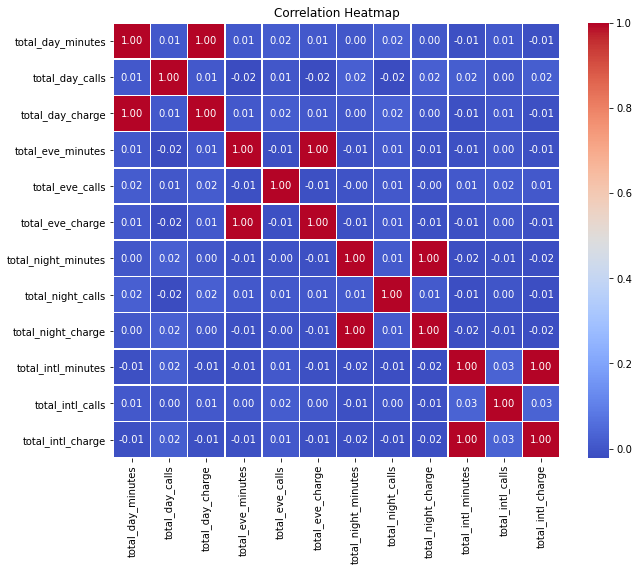

In [9]:
# Selecting numerical columns for correlation
nums = ['total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 
        'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge',
        'total_intl_minutes', 'total_intl_calls', 'total_intl_charge']
# Compute correlation matrix
correlation_matrix = df[nums].corr()


# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

From the correlation matrix heat map, columns that are highly correlated (close to 1) and redundant include:

1. **`total day minutes` and `total day charge`** 
2. **`total eve minutes` and `total eve charge`** 
3. **`total night minutes` and `total night charge`** 
4. **`total intl minutes` and `total intl charge`** 

We'll drop minutes columns in order to prevent multicollinearity amongest those features


In [10]:
df = df.drop(columns=['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_calls         3333 non-null   int64  
 10  total_eve_charge        3333 non-null   float64
 11  total_night_calls       3333 non-null   int64  
 12  total_night_charge      3333 non-null   float64
 13  total_intl_calls        3333 non-null   int64  
 14  total_intl_charge       3333 non-null   

In [11]:
#Checking the count of unique values in each column
df.nunique()

state                       51
account_length             212
area_code                    3
phone_number              3333
international_plan           2
voice_mail_plan              2
number_vmail_messages       46
total_day_calls            119
total_day_charge          1667
total_eve_calls            123
total_eve_charge          1440
total_night_calls          120
total_night_charge         933
total_intl_calls            21
total_intl_charge          162
customer_service_calls      10
churn                        2
dtype: int64

### Churn Distribution - Bar Chart

- This is an imbalanced dataset which needs to be addressed before modeling it can cause the model to make false predictions.

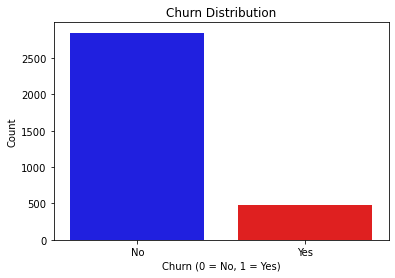

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df, palette=['blue', 'red'])
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

## Box plot showning Numerical columns churn count

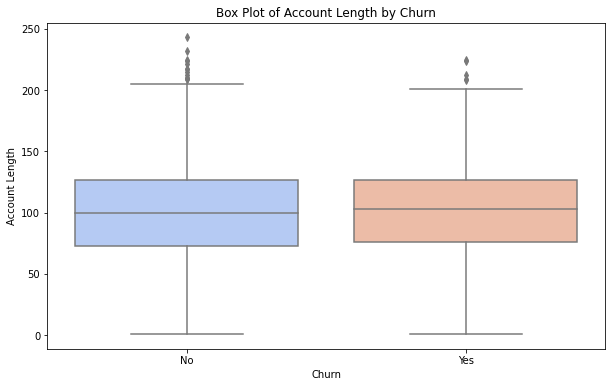

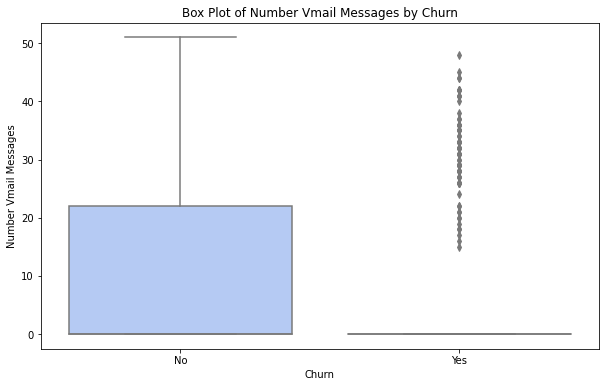

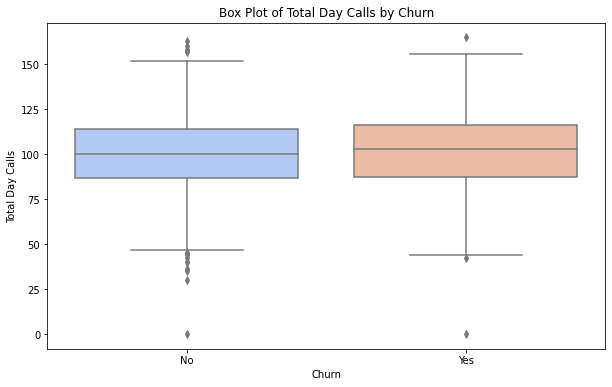

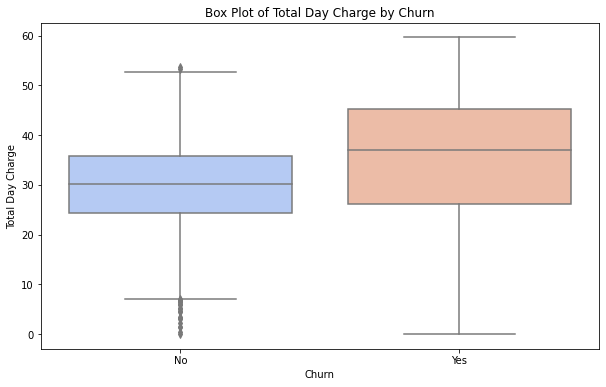

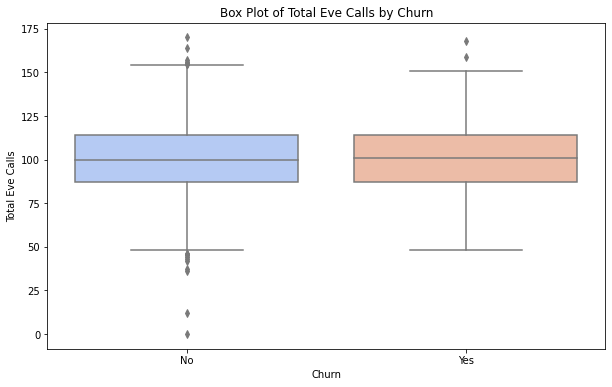

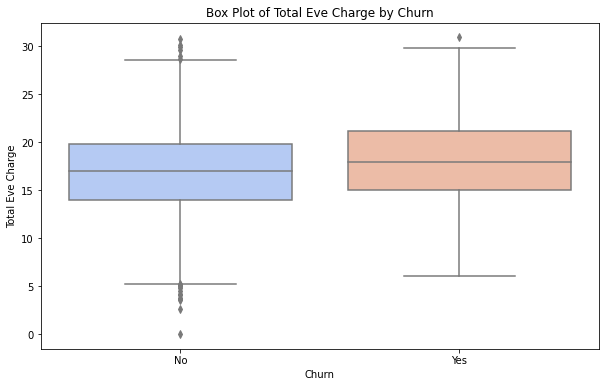

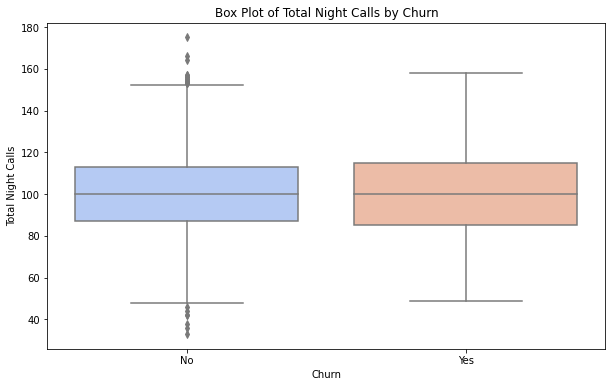

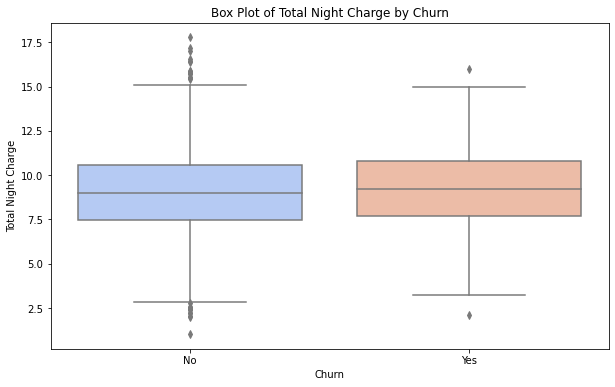

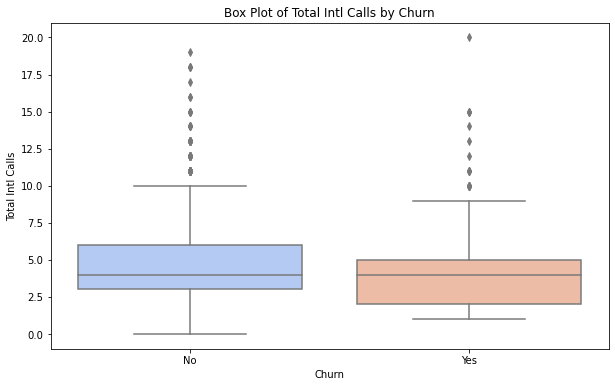

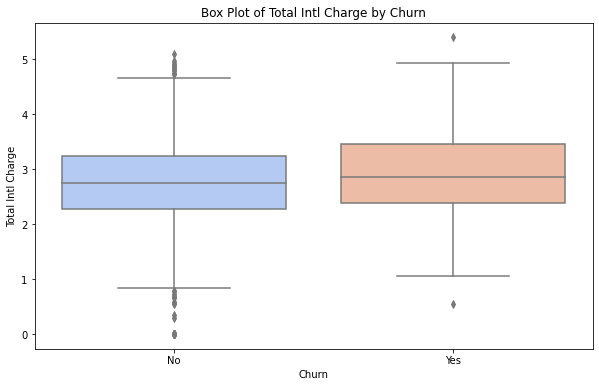

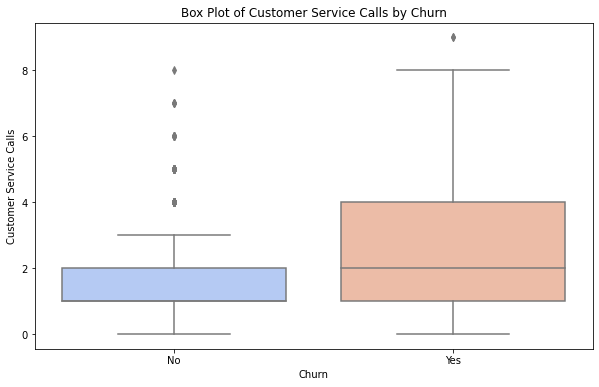

In [13]:
# Select numerical columns (excluding 'churn' if it's numerical)
numeric_cols = ["account_length", "number_vmail_messages", "total_day_calls", "total_day_charge", 
                "total_eve_calls", "total_eve_charge", "total_night_calls", "total_night_charge", 
                "total_intl_calls", "total_intl_charge", "customer_service_calls"]

# Loop through numerical columns and plot box plots
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x="churn", y=col, palette="coolwarm")
    plt.xlabel("Churn")
    plt.ylabel(col.replace("_", " ").title())
    plt.title(f"Box Plot of {col.replace('_', ' ').title()} by Churn")
    plt.xticks([0, 1], ["No", "Yes"])
    plt.show()


## Churn Count by International Plan 

<Figure size 864x360 with 0 Axes>

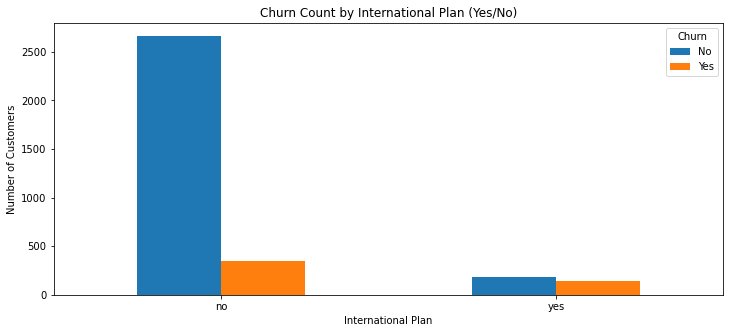

In [14]:
# Grouping by International Plan
churn_by_international_plan = df.groupby(['international_plan', 'churn']).size().unstack()

# Plot for International Plan
plt.figure(figsize=(12, 5))
churn_by_international_plan.plot(kind='bar', figsize=(12, 5))
plt.xlabel("International Plan")
plt.ylabel("Number of Customers")
plt.title("Churn Count by International Plan (Yes/No)")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.xticks(rotation=0)
plt.show()


## Key findings

- The majority of retained customers do not have an international plan.  

- Among customers with an international plan, those who churn are fewer than those who remain.

## Churn Count by Voice Mail Plan 

<Figure size 864x360 with 0 Axes>

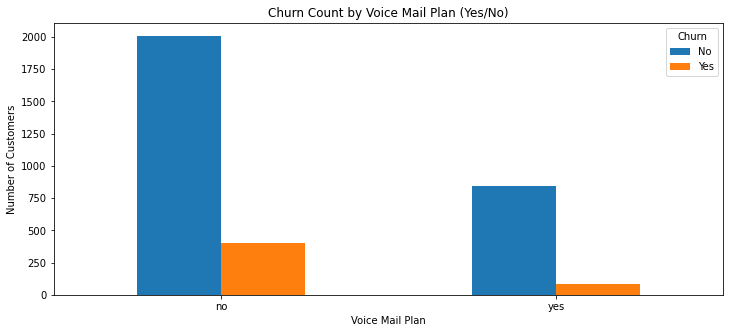

In [15]:
# Grouping by Voice Mail Plan
churn_by_voice_mail_plan = df.groupby(['voice_mail_plan', 'churn']).size().unstack()



# Plot for Voice Mail Plan
plt.figure(figsize=(12, 5))
churn_by_voice_mail_plan.plot(kind='bar', figsize=(12, 5))
plt.xlabel("Voice Mail Plan")
plt.ylabel("Number of Customers")
plt.title("Churn Count by Voice Mail Plan (Yes/No)")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.xticks(rotation=0)
plt.show()


## Key findings

- The majority of retained customers do not have an voicemail plan.  

- Among customers with an Voicemail plan, those who churn are fewer than those who remain.

## Churn by Area code

<Figure size 1080x432 with 0 Axes>

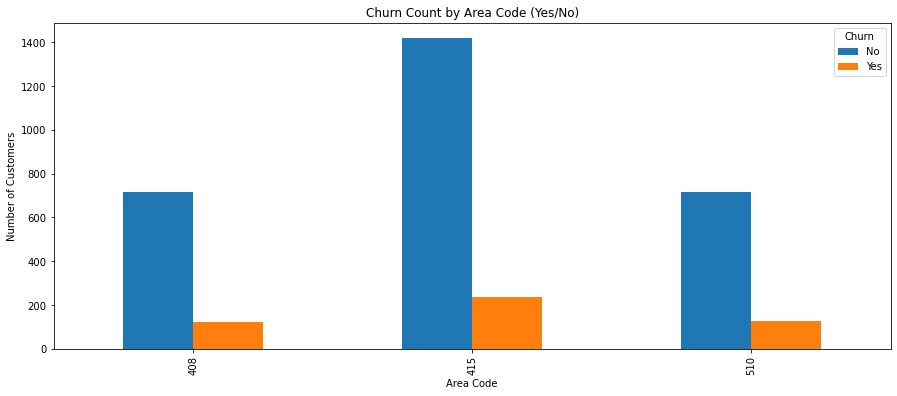

In [16]:
# Grouping by Area Code
churn_by_area_code = df.groupby(['area_code', 'churn']).size().unstack()

# Plot
plt.figure(figsize=(15, 6))
churn_by_area_code.plot(kind='bar', figsize=(15, 6))
plt.xlabel("Area Code")
plt.ylabel("Number of Customers")
plt.title("Churn Count by Area Code (Yes/No)")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.xticks(rotation=90)
plt.show()

## Dropping irrelevant columns

- Dropping **`state`**, **`area_code`**, and **`phone_number`** is a necessary step because these columns do not contribute meaningful patterns or predictions. This ensures the model focuses on the most relevant features for predicting customer churn.

In [17]:
# Drop irrelevant columns
df = df.drop(columns=['state','area_code', 'phone_number'], axis=1)
df.columns

Index(['account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_calls', 'total_day_charge',
       'total_eve_calls', 'total_eve_charge', 'total_night_calls',
       'total_night_charge', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

## Label Encoding
- Transforming categorical features into 0 and 1 to be able to use them in classification models.

In [18]:
# Making a copy of the data frame
df1 = df.copy()

# Convert 'churn' to numerical
le = LabelEncoder()
df1['churn'] = le.fit_transform(df1['churn'])  # 1 for churned, 0 for No Churn
df1[['churn']]

,churn
0,0
1,0
2,0
3,0
4,0
...,...
3328,0
3329,0
3330,0
3331,0


In [19]:
# Convert categorical variables
# Apply LabelEncoder to the categorical columns
df1['international_plan'] = le.fit_transform(df1['international_plan'])
df1['voice_mail_plan'] = le.fit_transform(df1['voice_mail_plan'])

df1

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,107,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,137,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,84,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,75,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,77,26.55,126,18.32,83,12.56,6,2.67,2,0
3329,68,0,0,0,57,39.29,55,13.04,123,8.61,4,2.59,3,0
3330,28,0,0,0,109,30.74,58,24.55,91,8.64,6,3.81,2,0
3331,184,1,0,0,105,36.35,84,13.57,137,6.26,10,1.35,2,0


In [20]:
# Checking the data frame information.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   international_plan      3333 non-null   int32  
 2   voice_mail_plan         3333 non-null   int32  
 3   number_vmail_messages   3333 non-null   int64  
 4   total_day_calls         3333 non-null   int64  
 5   total_day_charge        3333 non-null   float64
 6   total_eve_calls         3333 non-null   int64  
 7   total_eve_charge        3333 non-null   float64
 8   total_night_calls       3333 non-null   int64  
 9   total_night_charge      3333 non-null   float64
 10  total_intl_calls        3333 non-null   int64  
 11  total_intl_charge       3333 non-null   float64
 12  customer_service_calls  3333 non-null   int64  
 13  churn                   3333 non-null   int64  
dtypes: float64(4), int32(2), int64(8)
memory

## 4. Modeling
My aim is to find a model that balances a good recall (identify actual churners) and good precision (reducing false alarms).

### **Model 1: Logistic Regression**  
My first approach utilizes a **Logistic Regression Model**, a type of generalized linear model designed to predict the probability of a binary outcome—such as whether a customer will churn.  

In this case, we apply logistic regression to analyze the relationship between our features and the probability of customer churn by using default parameters

In [21]:
# Define feature set (X) and target variable (y)
X = df1.drop(columns=['churn'])
y = df1['churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [22]:
# Standardize numerical features
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [23]:

# Initialize and train logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_sc, y_train)


LogisticRegression(random_state=42)

In [24]:

# Make predictions
y_pred = log_reg.predict(X_test_sc)
y_pred_proba = log_reg.predict_proba(X_test_sc)[:, 1]   # Probability of positive class (churned)

# Predict churn for the train 
y_train_pred = log_reg.predict(X_train_sc)


In [25]:
# Evaluate model performance
test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, y_train_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Train Accuracy: {test_accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')
print('Confusion Matrix:\n', conf_matrix)


Test Accuracy: 0.8591
Train Accuracy: 0.8591
Precision: 0.5333
Recall: 0.2474
F1 Score: 0.3380
ROC AUC Score: 0.8169
Confusion Matrix:
 [[549  21]
 [ 73  24]]


In [26]:
# Generating the classification report
class_report = classification_report(y_test, y_pred)

# Print results
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       570
           1       0.53      0.25      0.34        97

    accuracy                           0.86       667
   macro avg       0.71      0.61      0.63       667
weighted avg       0.83      0.86      0.84       667



### **Interpretation of the Classification Report:**

The classification report provides key performance metrics for both classes (0 and 1).

#### **Class 0 (Non-Churned Customers)**
- **Precision: 0.88** → When the model predicts **"Not Churn" (0)**, it is correct **88%** of the time.
- **Recall: 0.96** → The model correctly identifies **96%** of all actual **non-churned** customers.
- **F1-Score: 0.92** → A balanced measure of precision and recall, meaning the model performs **very well** in identifying non-churned customers.

#### **Class 1 (Churned Customers)**
- **Precision: 0.53** → When the model predicts **"Churn" (1)**, it is correct **53%** of the time.  
- **Recall: 0.25** → The model only catches **24%** of actual churned customers (meaning it **misses** a lot of them).  
- **F1-Score: 0.34** → A low score due to poor recall, indicating that the model struggles to detect churn.



### **Overall Model Performance**
- **Accuracy: 0.86 (86%)** → The model correctly classifies **86%** of total customers.



### **Key Insights:**
1. **Model is biased toward predicting "No Churn" (0).**
   - High recall for class 0 (96%) but very low recall for class 1 (25%).
   - This suggests the model is **not identifying enough churned customers**.
   
   
2. **False Negatives are high (many churners are misclassified as non-churn).**
   - This is **risky** for businesses because missing churners means they cannot take proactive action to retain them.
   
   
3. **This model is likely underfitting because:**

   - Low recall (25%) suggests the model is too simple and fails to capture churners properly.
   - F1 Score is low (34%), which means the model does not generalize well to the test data.
   - High accuracy but poor recall indicates that the model is biased towards predicting customers as non-churners, potentially due to class imbalance.


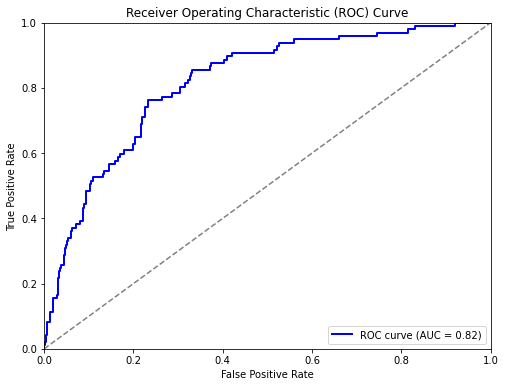

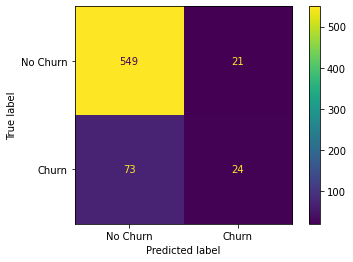

In [27]:
# Plot the ROC curve for test data

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)


fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
ax.plot([0, 1], [0, 1], color='gray', linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')
ax.legend(loc="lower right")

plt.show()

# Display the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['No Churn', 'Churn'])
disp.plot(cmap='viridis')


### **Interpretation:**
- **True Negatives (TN) = 549** → Customers correctly predicted as *not churning*  
- **False Positives (FP) = 21** → Customers incorrectly predicted as *churning* (but they didn't)  
- **False Negatives (FN) = 73** → Customers incorrectly predicted as *not churning* (but they did)  
- **True Positives (TP) = 24** → Customers correctly predicted as *churning* 

**Therefore**, the first model it fails to predict churned customers. We'll need to deal with class balance with SMOTE.




## MODEL 1.2 LOGISTIC MODEL - DEALING WITH CLASS IMBALANCE WITH SMOTE

- Adjusting the model to adjust for class imbalance in the target variable to see if there are resonable improvements.

In [28]:
# Initializing smote
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_sc, y_train)

# The classes should now be balanced
print(y_train_resampled.value_counts()) 


churn
0    2280
1    2280
Name: count, dtype: int64


In [29]:
# Fitting the logistic Regression model
log_reg2_smote = LogisticRegression(random_state=42, class_weight='balanced')
log_reg2_smote.fit(X_train_resampled, y_train_resampled)


LogisticRegression(class_weight='balanced', random_state=42)

In [30]:
# Get predictions for both test and train sets
y_train_pred = log_reg2_smote.predict(X_train_sc)
y_pred = log_reg2_smote.predict(X_test_sc)
y_pred_proba = log_reg2_smote.predict_proba(X_test_sc)[:, 1]  # Extract probability for class 1

# Evaluate performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')
print('Confusion Matrix:\n', conf_matrix)


Train Accuracy: 0.7757
Test Accuracy: 0.7616
Precision: 0.3465
Recall: 0.7216
F1 Score: 0.4682
ROC AUC Score: 0.8095
Confusion Matrix:
 [[438 132]
 [ 27  70]]


In [31]:
# Classification Report
y_pred = log_reg2_smote.predict(X_test_sc)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.77      0.85       570
           1       0.35      0.72      0.47        97

    accuracy                           0.76       667
   macro avg       0.64      0.75      0.66       667
weighted avg       0.86      0.76      0.79       667



### **Interpretation of Classification Report:**

This classification report summarizes the model’s performance across different evaluation metrics for **churn prediction**. 



### Key Observations:

#### Class 0 (Not Churn):
- **Precision (94%)**: When the model predicts "Not Churn," it is correct **94% of the time**.
- **Recall (77%)**: It correctly identifies **77% of actual non-churners**.
- **F1 Score (85%)**: A good balance between precision and recall.

#### Class 1 (Churn) :
- **Precision (35%)**: When the model predicts "Churn," it is correct **only 35% of the time** (low precision).  
  - Many non-churners are mistakenly classified as churn (high **false positives**). If we target customers predicted to churn with special offers, a low precision means we’ll spend resources on many customers who were not actually at risk of leaving.
  
- **Recall (72%)**: The model **catches 72% of actual churners**.  
  - This is **good** but still misses **28% of real churners** (false negatives) meaning some customers at risk are not being identified.Since recall is prioritized in churn prediction, the model does a fair job of identifying at-risk customers.
  
- **F1 Score (47%)**: Since **recall is higher than precision** the model is biased toward recall, which is better in churn prediction because missing churners (false negatives) is worse than mistakenly identifying non-churners as churners (false positives).


### **Overall Model Performance**
- **Accuracy: 0.76 (76%)** → The model correctly classifies **76%** of total customers.




###  Business Impact Analysis

  - **Low precision for churners (35%)** means many customers are falsely flagged as "at risk" of leaving.
  - This could lead to **wasting retention offers/resources** on customers who were not going to leave.
  - **28% of real churners are still being missed**, meaning **some customers at risk are not being identified**.


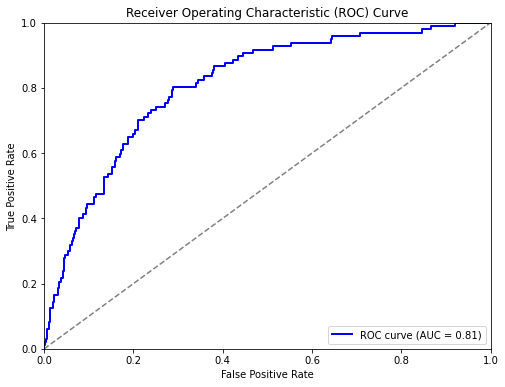

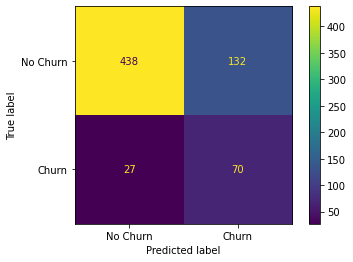

In [32]:
# Plot the ROC curve for test data

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)


fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
ax.plot([0, 1], [0, 1], color='gray', linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')
ax.legend(loc="lower right")

plt.show()

# Display the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['No Churn', 'Churn'])
disp.plot(cmap='viridis')

### **Interpretation of the confusion matrix:**
- **True Negatives (TN) = 438** → Customers correctly predicted as *not churning*  
- **False Positives (FP) = 132** → Customers incorrectly predicted as *churning* (but they didn't)  
- **False Negatives (FN) = 27** → Customers incorrectly predicted as *not churning* (but they did)  
- **True Positives (TP) = 70** → Customers correctly predicted as *churning* 


### **Key Takeaways**
- **SMOTE increased recall from 25% to 72%**  (Better at identifying churners).
- **Precision dropped from 53% to 35%**  (More false positives → higher cost of retention efforts).
- **Accuracy and ROC AUC decreased**, showing that the model now prioritizes finding churners rather than overall correctness.
- **F1 Score improved**, meaning the model is more balanced in handling both churn and non-churn predictions.

### **Alternative Models**
Since we want a model that balances **high recall (finding churners) and good precision (reducing false alarms)**, we can try:
**Random Forest Classifier**, **DecisionTreeClassifier**  (Better for feature importance & reducing overfitting)


## Model 2: Decision Tree Classifier

- Based on the initial data split, we will train, test, and evaluate the model using a Decision Tree Classifier. We will begin by training the model using the X_train and y_train datasets.

In [33]:
# Initialize the Decision Tree Classifier
dtclf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the encoded training data
dtclf.fit(X_train, y_train)

# Make predictions on the encoded testing data
y_pred = dtclf.predict(X_test)

In [34]:
# Evaluate the model's performance
dtclf_accuracy = accuracy_score(y_test, y_pred)
dtclf_precision = precision_score(y_test, y_pred)
dtclf_recall = recall_score(y_test, y_pred)
dtclf_f1 = f1_score(y_test, y_pred)

print('Accuracy ', dtclf_accuracy)
print('Precision ', dtclf_precision)
print('Recall ', dtclf_recall)
print('f1_Score ', dtclf_f1)

#Calculate train and test scores
train_score = dtclf.score(X_train, y_train)
test_score = dtclf.score(X_test, y_test)

print('train score ', train_score)
print('test score ', test_score)

Accuracy  0.9055472263868066
Precision  0.6847826086956522
Recall  0.6494845360824743
f1_Score  0.6666666666666666
train score  1.0
test score  0.9055472263868066


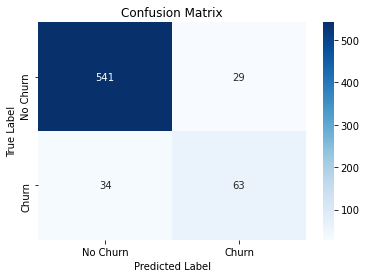

In [35]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


### **Interpretation of the Decision Tree Classifier Results**  

1. **Accuracy (90%)**  
   - The model correctly classified approximately **90%** of the test samples.  
   - This suggests the model performs well overall but does not necessarily indicate balanced performance across all classes.

2. **Precision (68%)**  
   - A precision of **68%** suggests that when the model predicts a positive class, it is correct about **68%** of the time.
   
3. **Recall (64.94%)**  
   - With **64.94%** recall, the model captures a majority of actual positive cases but misses some (false negatives).  


4. **F1-Score (66.6%)**  
   - **66.6%** indicates a trade-off between precision and recall.  
   
   
5. **Train Score (1.0 or 100%)**  
   - The model **perfectly** classified all training data, which is a strong indicator of **overfitting** which suggests that the model memorizes the training data instead of generalizing well.

6. **Test Score (90%)**  
   - The drop from **100% (train)** to **90% (test)** shows that the model generalizes fairly well but might still be slightly overfitting.


**Next Steps to Improve Performance:**  
  - **Pruning the decision tree** (reduce depth to prevent overfitting).  
  - **Tuning hyperparameters** (e.g., `max_depth`, `min_samples_split`).  
  


## Model 2.1: Decision Tree Classifier
## Improving the Decision Tree model using GridSeachCV

I'll use grid search to identify the best model parameters that improve performance.

In [36]:
# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 5],  
    'criterion': ['gini', 'entropy']  
}

# Initialize Decision Tree Classifier
dtclf = DecisionTreeClassifier(random_state=42)

# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(dtclf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model
best_dtclf = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Making predictions
y_pred = best_dtclf.predict(X_test)

# Computing training score
train_score = best_dtclf.score(X_train, y_train)

# Computing testing score
test_score = best_dtclf.score(X_test, y_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


print(f"Train Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy: 0.9370
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       570
           1       0.86      0.68      0.76        97

    accuracy                           0.94       667
   macro avg       0.90      0.83      0.86       667
weighted avg       0.93      0.94      0.93       667

Confusion Matrix:
[[559  11]
 [ 31  66]]
Train Score: 0.9700
Test Score: 0.9370


### Interpretation of the Improved Decision Tree Classifier Results 

####  Best Model Parameters
The best hyperparameters selected via **GridSearchCV**:  
- **Criterion:** `gini` → The tree splits nodes based on the Gini impurity.  
- **Max Depth:** `10` → Limits the tree's depth to prevent overfitting.  
- **Min Samples Leaf:** `2` → Ensures each leaf node has at least two samples, improving generalization.  
- **Min Samples Split:** `10` → A node must have at least 10 samples to split, reducing unnecessary splits.  

These parameters indicate a **well-optimized tree that balances complexity and performance.**  

####  Model Performance Metrics

- The **high accuracy (93.7%)** suggests the model performs well on unseen data.  
- The **train score (97%)** is slightly higher than the test score, but not excessively, meaning **minimal overfitting**.  


####  Classification Report Analysis

- **Precision for Class 0 (Majority Class)** is **0.95**, meaning **95% of predicted Class 0 instances were correct**.  
- **Recall for Class 0** is **0.98**, indicating that **98% of actual Class 0 instances were correctly identified**.  
- **Precision for Class 1 (Minority Class)** is **0.86**, which means **some false positives exist**.  
- **Recall for Class 1** is **0.68**, meaning **only 68% of actual Class 1 instances were correctly classified**.  
- The **F1-score for Class 1 is 0.76**, which is lower than Class 0, indicating room for improvement in detecting minority class cases.  



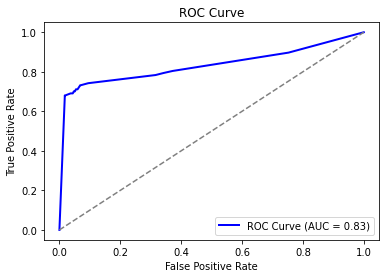

In [37]:
# Get probability estimates for the positive class
y_prob = best_dtclf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


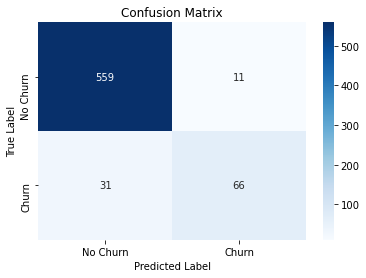

In [38]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



#### **Confusion Matrix Analysis**  
- **True Positives (TP) = 66** → Correctly predicted Class 1.  
- **True Negatives (TN) = 559** → Correctly predicted Class 0.  
- **False Positives (FP) = 11** → Class 0 wrongly classified as Class 1.  
- **False Negatives (FN) = 31** → Class 1 wrongly classified as Class 0.  

**Low False Positives (11)** → Good at avoiding unnecessary misclassification of Class 0.  
**Higher False Negatives (31)** → Some Class 1 instances are being misclassified as Class 0. 


### **Overall Interpretation:**
 **Strengths:**  
- **High accuracy (93.7%)** with **minimal overfitting**.  
- **Great performance on the majority class 0 (No Churn).**  
- **Well-balanced precision and recall for Class 0.**  

**Areas for Improvement:**  
- **Recall for Class 1 (68%) is lower, meaning some minority class instances are missed.**  
- **31 false negatives indicate the model sometimes fails to detect the minority class.**  

---

### **Next Step:**
 . **Use Ensemble Methods:** i.e. **Random Forest** that oould improve minority class recall.  
  


## Model 3: RandomForestClassifier

In [39]:
# Initialize a baseline Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Compute training and testing scores
train_score = rf_clf.score(X_train, y_train)
test_score = rf_clf.score(X_test, y_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"Train Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")


Accuracy: 0.9325
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       570
           1       0.89      0.61      0.72        97

    accuracy                           0.93       667
   macro avg       0.92      0.80      0.84       667
weighted avg       0.93      0.93      0.93       667

Confusion Matrix:
[[563   7]
 [ 38  59]]
Train Score: 1.0000
Test Score: 0.9325


###  Interpretation of the Random Forest Model Results

####  Accuracy: 0.9340 (93.4%)
- The model correctly classifies **93.4%** of the test samples.
- This indicates **strong overall performance**.



#### Classification Report Analysis  

- **Precision (0.89 for Class 1)** → When the model predicts Class 1 (positive), it is correct **89% of the time**.  
- **Recall (0.61 for Class 1)** → The model only identifies **61% of actual Class 1 cases**. This suggests **many false negatives** (misclassifying actual Class 1 as Class 0).  
- **F1-score (0.72 for Class 1)** → A **balance between precision & recall**, but lower than Class 0 due to recall issues.



#### Confusion Matrix Analysis

- **563 True Negatives (TN)** → Correctly predicted Class 0.  
- **59 True Positives (TP)** → Correctly predicted Class 1.  
- **7 False Positives (FP)** → Incorrectly predicted as Class 1 when it was Class 0.  
- **38 False Negatives (FN)** → **Missed** 38 actual Class 1 cases (misclassified as Class 0).  



#### Overfitting Concern
- **Train Score = 1.000 (100%)** vs. **Test Score = 0.9340 (93.4%)**  
- The model **perfectly fits** the training data, but slightly drops in the test set.  
- This suggests **possible overfitting**, meaning the model memorized training patterns rather than generalizing well.



### Key Insights & Recommendations 
 - The model struggles with **recall for Class 1 (61%)**, meaning many **false negatives**. Therefore we'll need to apply **Random Over-Sampling (ROS)** combined with **Random Under-Sampling (RUS)** to balance the classes.
 - Implement **Hyperparameter Tuning**  
   - Increase `n_estimators`, adjust `max_depth`.


## Model 3.1: RandomForestClassifier
## Improving the RandomForestClassifier with ROS AND RUS


In [40]:

# Step 1: Applying Random Over-Sampling (ROS) to balance the minority class
ros = RandomOverSampler(sampling_strategy=0.8, random_state=42)  # Increase minority class to 80% of majority
X_ros, y_ros = ros.fit_resample(X_train, y_train)

print("Class distribution after ROS:", Counter(y_ros))

# Step 2: Applying Random Under-Sampling (RUS) to reduce the majority class
rus = RandomUnderSampler(sampling_strategy=0.9, random_state=42)  # Reduce majority class to 90% of its original size
X_resampled, y_resampled = rus.fit_resample(X_ros, y_ros)

print("Class distribution after ROS + RUS:", Counter(y_resampled))

# Step 3: Training the Random Forest classifier
rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf.fit(X_resampled, y_resampled)

# Step 4: Making predictions
y_pred = rf.predict(X_test)

# Step 5: Computing training and testing scores
train_score = rf.score(X_resampled, y_resampled)
test_score = rf.score(X_test, y_test)

# Step 6: Evaluating model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"Train Score: {train_score:.4f}")
print(f"Test Score: {test_score:.4f}")


Class distribution after ROS: Counter({0: 2280, 1: 1824})
Class distribution after ROS + RUS: Counter({0: 2026, 1: 1824})
Accuracy: 0.9160
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       570
           1       0.70      0.75      0.72        97

    accuracy                           0.92       667
   macro avg       0.83      0.85      0.84       667
weighted avg       0.92      0.92      0.92       667

Confusion Matrix:
[[538  32]
 [ 24  73]]
Train Score: 0.9784
Test Score: 0.9160


AUC Score: 0.8976


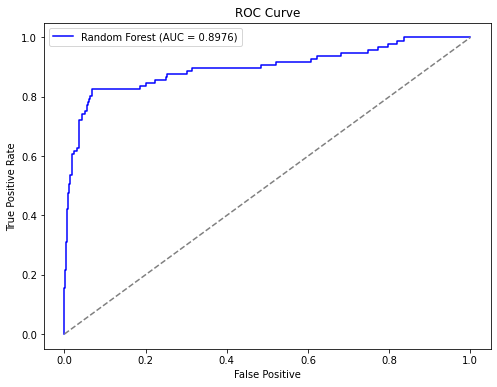

In [41]:
# Plotting ROC Curve
# Get predicted probabilities for the positive class (class 1)
y_probs = rf.predict_proba(X_test)[:, 1]  # Get probabilities for class 1

# Compute AUC score
auc_score = roc_auc_score(y_test, y_probs)
print(f"AUC Score: {auc_score:.4f}")

# Step 3: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.4f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  
plt.xlabel('False Positive')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


### Interpretation of the Random Forest Model Metrics

#### Class Distribution After Resampling
- **Before ROS + RUS:** Imbalance existed with fewer churn cases (Class 1).  
- **After ROS (Random Over-Sampling):** Increased minority class (churn) to **80%** of the majority.  
  - `Counter({0: 2280, 1: 1824})`
- **After RUS (Random Under-Sampling):** Reduced majority class (non-churn) to **90%** of its original size.  
  - `Counter({0: 2026, 1: 1824})`
- **Impact:** The dataset is now more balanced, allowing the model to better learn from churn cases.

---

#### Model Performance (Random Forest with 50 trees, max depth = 10)
- **Train Score:** **97.53%** (good fit, but slightly high—possible overfitting)  
- **Test Score:** **91.45%** (strong generalization ability)

##### Accuracy:  91.45%
- This means **91.45% of customers are correctly classified as churn or non-churn**.  
- High accuracy suggests the model is well-tuned.

##### Precision & Recall Breakdown 

- **Precision for Churn (70%)**  
  - When the model predicts a customer will churn, it is correct **70%** of the time.
  - Some false positives exist (non-churn customers misclassified as churn).
  
- **Recall for Churn (75%)**  
  - The model identifies **75%** of actual churners.
  - **It misses 25% of true churners**



Confusion Matrix (Raw Values):
[[538  32]
 [ 24  73]]


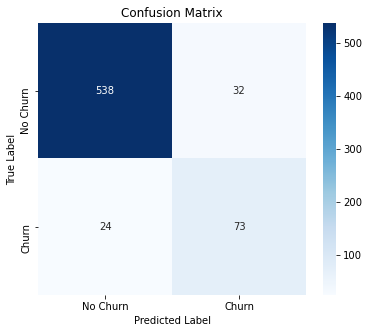

In [42]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print raw confusion matrix
print("Confusion Matrix (Raw Values):")
print(cm)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


##### Confusion Matrix

- **True Positives (73 customers):**  
  - These customers were **Correctly classified as True churners**.  


- **True Negatives (538 customers):**  
  - These customers were **Correctly classified as Not churners**.  


- **False Positives (32 customers):**  
  - These customers were **wrongly classified as churners instead of Not churners**.  


- **False Negatives (24 customers):**  
  - These **actual churners were missed.**




## 5. Evaluation

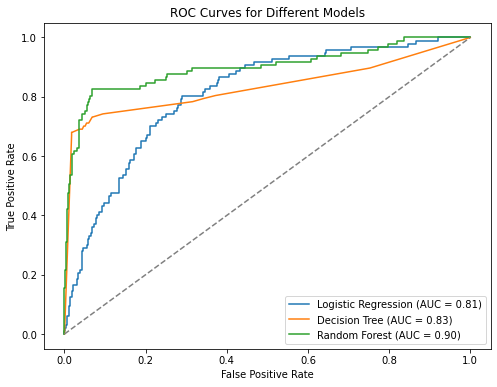

In [43]:
# Initialize classifiers and resampling techniques
classifiers = {
    "Logistic Regression": {
        "model": LogisticRegression(random_state=42),
        "resampler": SMOTE(random_state=42)
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "grid_search": {
            "param_grid": {
                "max_depth": [3, 5, 10],
                "min_samples_split": [2, 5, 10],
                "min_samples_leaf": [1, 2, 5],
                "criterion": ["gini", "entropy"]
            },
            "cv": 5,
            "scoring": "accuracy"
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42),
        "resampler": (RandomOverSampler(sampling_strategy=0.8, random_state=42), 
                      RandomUnderSampler(sampling_strategy=0.9, random_state=42))
    }
}

# Plot ROC curves
plt.figure(figsize=(8, 6))

for name, config in classifiers.items():
    # Resampling if applicable
    if "resampler" in config:
        if isinstance(config["resampler"], tuple):  # ROS + RUS for Random Forest
            X_resampled, y_resampled = config["resampler"][0].fit_resample(X_train, y_train)
            X_resampled, y_resampled = config["resampler"][1].fit_resample(X_resampled, y_resampled)
        else:
            X_resampled, y_resampled = config["resampler"].fit_resample(X_train_sc, y_train)
    else:
        X_resampled, y_resampled = X_train, y_train
    
    # Grid search for Decision Tree
    if "grid_search" in config:
        grid_search = GridSearchCV(config["model"], config["grid_search"]["param_grid"], 
                                   cv=config["grid_search"]["cv"], scoring=config["grid_search"]["scoring"])
        grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_
    else:
        model = config["model"]
        model.fit(X_resampled, y_resampled)

    # Predict probabilities for ROC Curve
    y_probs = model.predict_proba(X_test_sc if name == "Logistic Regression" else X_test)[:, 1]
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc_score = roc_auc_score(y_test, y_probs)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

# Plot random classifier line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.show()


## DataFrame compare the models classification metrics

In [44]:
# Model performance metrics
data = {
    "Model": [
        "Logistic Regression (SMOTE)",
        "Decision Tree (Grid Search)",
        "Random Forest(ROS & RUS)",
        
    ],
    "Accuracy(Test set)": [0.76, 0.94, 0.92],
    "Precision (Class 1)": [0.35, 0.86, 0.70],
    "Recall (Class 1)": [0.72, 0.68, 0.75],
    "F1-Score (Class 1)": [0.47, 0.76, 0.72],
    "ROC AUC Score": [0.8095, 0.83, 0.8976],
    "False Positives": [132, 11, 32],
    "False Negatives": [27, 31, 24]
}

# Creating a DataFrame
df_results = pd.DataFrame(data)

# Displaying the DataFrame
df_results


,Model,Accuracy(Test set),Precision (Class 1),Recall (Class 1),F1-Score (Class 1),ROC AUC Score,False Positives,False Negatives
0,Logistic Regression (SMOTE),0.76,0.35,0.72,0.47,0.8095,132,27
1,Decision Tree (Grid Search),0.94,0.86,0.68,0.76,0.8300,11,31
2,Random Forest(ROS & RUS),0.92,0.70,0.75,0.72,0.8976,32,24



### Interpretation:
- **Logistic Regression (SMOTE)**: Has the lowest precision(35%) and accuracy but achieves high recall(72%), meaning it identifies more actual churners at the cost of more false positives.

- **Decision Tree (Grid Search)**: Has the highest accuracy of the Test set and precision(86%) but lower recall, meaning it misses more actual churners.

- **Random Forest (ROS & RUS)**: Balances precision and recall fairly well with a high AUC score (0.8976), meaning it has a strong overall classification ability.


### Model to consider:

- Recommended Model: **Random Forest** - Since my goal is to find a good balance between **recall (identifying actual churners)** and **precision (reducing false alarms)**.

## Feature importance of the best model

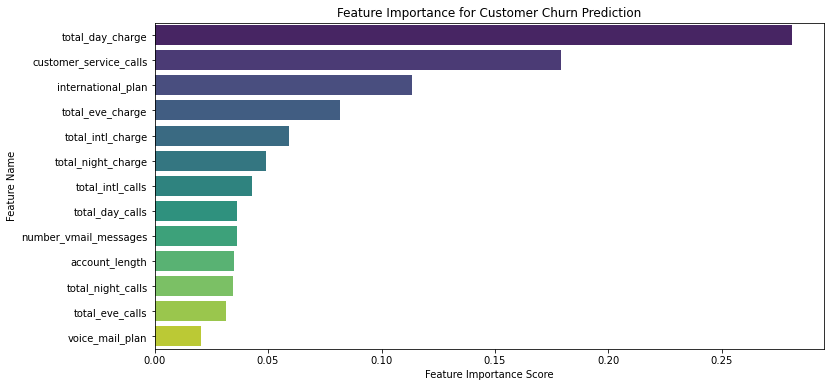

In [45]:
# Get feature importance scores
feature_importance = rf.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort features by importance (descending)
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')

# Add labels and title
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature Name')
plt.title('Feature Importance for Customer Churn Prediction')
plt.show()


## Conclusions



I recommend that Syriatel adopt the Random Forest Classifier as the primary model for predicting customer churn. This model demonstrates a superior ROC curve and strong overall performance in terms of accuracy, F1-score, recall, and precision on the test set, making it highly effective for distinguishing between customers who are likely to churn and those who are not.

### Recommendations for SyriaTel:
- **Improve Customer Support**: Since customer service calls are a top factor, reducing response times and improving service quality can enhance customer retention.
- **Review Pricing Plans**: The strong influence of total day, evening, and international charges suggests that pricing might be a churn driver. Offering better rates or more flexible plans could help.
- **Personalized Plan Recommendations**: If customers with high usage in specific categories (e.g., international calls) tend to churn, proactive personalized plan recommendations could help keep them.i.e. Offering a Bonus of extra calls when a certain target of international calls is reached by the customer.
- **Loyalty Programs**: Target high-usage customers with discounts or rewards to keep them engaged fully.

